In [1]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor,RandomForestClassifier

import warnings
warnings.filterwarnings(action='ignore')

!pip install category_encoders
import category_encoders as ce
ohe = ce.OneHotEncoder()

# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv',index_col=False)

# Retrait des variables inutiles
df.drop(['Rank','Name','gamename','serie','NA_Sales','EU_Sales','JP_Sales','Other_Sales','metaNoteQ','samename','developper'],axis=1,inplace=True)


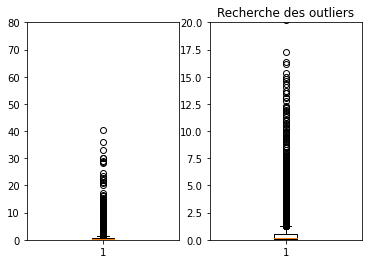

In [2]:
# Recherche des outliers
#plt.scatter(df.index,df['Global_Sales']);

plt.subplot(1,2,1)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,80]);

plt.subplot(1,2,2)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,20]);

plt.title("Recherche des outliers")

# Retrait des outliers
#df = df[df['Global_Sales']<20]

# Recherche des données manquantes
df.isnull().sum()

# Remplacement des années manquantes par 0 (autres)
df[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)

# Remplacement des Publishers manquants par unknown
df['Publisher'] = df['Publisher'].fillna('unknown')

# Traitement des données catégorielles
df2 = ohe.fit_transform(df)

In [11]:
df2.info(20)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11523 entries, 17 to 11539
Data columns (total 2241 columns):
 #     Column           Dtype  
---    ------           -----  
 0     Platform_1       int64  
 1     Platform_2       int64  
 2     Platform_3       int64  
 3     Platform_4       int64  
 4     Platform_5       int64  
 5     Platform_6       int64  
 6     Platform_7       int64  
 7     Platform_8       int64  
 8     Platform_9       int64  
 9     Platform_10      int64  
 10    Platform_11      int64  
 11    Platform_12      int64  
 12    Platform_13      int64  
 13    Platform_14      int64  
 14    Platform_15      int64  
 15    Platform_16      int64  
 16    Platform_17      int64  
 17    Platform_18      int64  
 18    Platform_19      int64  
 19    Platform_20      int64  
 20    Platform_21      int64  
 21    Platform_22      int64  
 22    Platform_23      int64  
 23    Platform_24      int64  
 24    Platform_25      int64  
 25    Platform_26      

# Preprocessing

In [3]:
#scaler = preprocessing.RobustScaler().fit_transform(df2)

# définition de la target et data
target = np.log(df2['Global_Sales'])
data = df2.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Avec outliers
scaler = preprocessing.RobustScaler()

#Sans outliers
#scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Régression Linéaire

In [4]:
# Test du modèle de Régression Linéaire

# Brut

print("Données brutes")

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train score :", lr.score(X_train,y_train))
print("Test score :",lr.score(X_test,y_test))

y_pred = lr.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print("\n")

# Scaled

print("Données Scalées")

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

print("Train score :", lr_scaled.score(X_train_scaled,y_train))
print("Test score :",lr_scaled.score(X_test_scaled,y_test))

y_pred = lr_scaled.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Données brutes
Train score : 0.4724730674537798
Test score : -834796695504.8677
MAE :  120728.90391241288


Données Scalées
Train score : 0.47246833508297104
Test score : -1.0361123079000008e+17
MAE :  11394969.309990924


# Modèle Ridge

In [5]:
# Test du modèle Ridge
RD_model = Ridge()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'solver': ['auto', 'cholesky', 'lsqr', 'sparse_cg', 'lbfgs']}

RD = GridSearchCV(RD_model, tuned_parameters, cv = 10)
RD.fit(X_train, y_train)

print("Train score :", RD.score(X_train,y_train))
print("Test score :",RD.score(X_test,y_test))

y_pred = RD.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", RD.best_params_)
print ("Best Score", RD.best_score_)

Train score : 0.46167950101220345
Test score : 0.44645481136559584
MAE :  0.8408132800439054
Best Params {'alpha': 3.1, 'fit_intercept': True, 'normalize': False, 'solver': 'auto'}
Best Score 0.4282221097914462


In [6]:
# Test sur données scalées

RD_model = Ridge()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'solver': ['auto', 'cholesky', 'lsqr', 'sparse_cg', 'lbfgs']}

RD_scaled = GridSearchCV(RD_model, tuned_parameters, cv = 10)
RD_scaled.fit(X_train_scaled, y_train)

print("Train score :", RD_scaled.score(X_train_scaled,y_train))
print("Test score :",RD_scaled.score(X_test_scaled,y_test))

y_pred = RD_scaled.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", RD_scaled.best_params_)
print ("Best Score", RD_scaled.best_score_)

Train score : 0.4614301594943573
Test score : 0.44640692689021755
MAE :  0.8408634291036895
Best Params {'alpha': 3.2, 'fit_intercept': True, 'normalize': False, 'solver': 'auto'}
Best Score 0.42822289969775823


# Modèle Lasso

In [7]:
# Test du modèle Lasso sur données brutes

LS_model = Lasso()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}

LS = GridSearchCV(LS_model, tuned_parameters, cv = 10)
LS.fit(X_train, y_train)

print("Train score :", LS.score(X_train,y_train))
print("Test score :",LS.score(X_test,y_test))

y_pred = LS.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", LS.best_params_)
print ("Best Score", LS.best_score_)

Train score : 0.1585516205521531
Test score : 0.18456699794842524
MAE :  1.0411032604152244
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'}
Best Score 0.15514292926154757


In [8]:
# Test du modèle Lasso sur les données scalées

LS_model = Lasso()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}


LS = GridSearchCV(LS_model, tuned_parameters, cv = 10)
LS.fit(X_train_scaled, y_train)

print("Train score :", LS.score(X_train_scaled,y_train))
print("Test score :",LS.score(X_test_scaled,y_test))

y_pred = LS.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", LS.best_params_)
print ("Best Score", LS.best_score_)

Train score : 0.13521254416324713
Test score : 0.15425242229097547
MAE :  1.0679794363974449
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'}
Best Score 0.1303727590337606


# Modèle ElasticNet

In [9]:
# Test du modèle ElasticNet sur données brutes

EN_model = ElasticNet()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}

EN = GridSearchCV(EN_model, tuned_parameters, cv = 10)
EN.fit(X_train, y_train)

print("Train score :", EN.score(X_train,y_train))
print("Test score :",EN.score(X_test,y_test))

y_pred = EN.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", EN.best_params_)
print ("Best Score", EN.best_score_)

Train score : 0.20072005892838118
Test score : 0.22479524402153983
MAE :  1.0172760816834596
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'random'}
Best Score 0.19614580804135873


In [10]:
# Test du modèle ElasticNet sur données scalées

EN_model = ElasticNet()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}

EN_scaled = GridSearchCV(EN_model, tuned_parameters, cv = 10)
EN_scaled.fit(X_train_scaled, y_train)

print("Train score :", EN_scaled.score(X_train_scaled,y_train))
print("Test score :",EN_scaled.score(X_test_scaled,y_test))

y_pred = EN_scaled.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", EN_scaled.best_params_)
print ("Best Score", EN_scaled.best_score_)

Train score : 0.192155395696605
Test score : 0.21193727843619703
MAE :  1.028840610280023
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'random'}
Best Score 0.1866842415225521


# Preprocessing pour modèles catégorielles

In [11]:
df3=df
df3[["Genre","Publisher", "Platform"]] = ohe.fit_transform(df[["Genre","Publisher","Platform"]])
target = (df3['Global_Sales']*100).astype('int')
data = df3.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Scale
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test de différents modèles catégorielles

In [12]:
# Test modèle KNN

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train_scaled,y_train)
print("Train score :", knn.score(X_train_scaled,y_train))
print("Test score :",knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.3654679376083189
Test score : 0.0415944540727903
MAE :  73.84012131715771


In [19]:
# Test modèle Regression Logistic

print("Données brutes")
lr = LogisticRegression(C=1.0)
lr.fit(X_train_scaled,y_train)
print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print("\n")
print("Données scalées")

lr = LogisticRegression(C=1.0)
lr.fit(X_train_scaled,y_train)
print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.05675909878682842
Test score : 0.04852686308492201
MAE :  53.396447140381284


Données scalées
Train score : 0.05675909878682842
Test score : 0.04852686308492201
MAE :  53.396447140381284


In [18]:
# test modèle Decision Tree

#Données brutes
print("Données brutes")
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
print("Train score :", dt_clf.score(X_train,y_train))
print("Test score :",dt_clf.score(X_test,y_test))

y_pred = dt_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print("\n")
print("Données scalées")
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = dt_clf.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Données brutes
Train score : 0.985051993067591
Test score : 0.042027729636048526
MAE :  56.75346620450607


Données brutes
Train score : 0.985051993067591
Test score : 0.04289428076256499
MAE :  57.4263431542461


In [20]:
# test modèle random forest

from sklearn.ensemble import RandomForestClassifier

print("Données brutes")
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = RF_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print("\n")
print("Données scalées")

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = RF_clf.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Données brutes
Train score : 0.985051993067591
Test score : 0.04289428076256499
MAE :  60.57538994800693


Données scalées
Train score : 0.985051993067591
Test score : 0.04289428076256499
MAE :  55.25389948006932


# Application du meilleur modèle

In [10]:
RD_final = Ridge(alpha=3.2,fit_intercept=True,normalize=False,solver="auto")

RD_final.fit(X_train_scaled, y_train)

print("Train score :", RD_final.score(X_train_scaled,y_train))
print("Test score :",RD_final.score(X_test_scaled,y_test))

y_pred = RD_final.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.45988888925757054
Test score : 0.45404984122258674
MAE :  0.8343346339751921


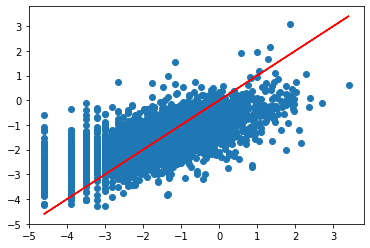

In [22]:
plt.scatter(y_test,y_pred);
plt.plot(y_test,y_test,color='red');
#plt.xlim([0,4])
#plt.ylim([0,5])

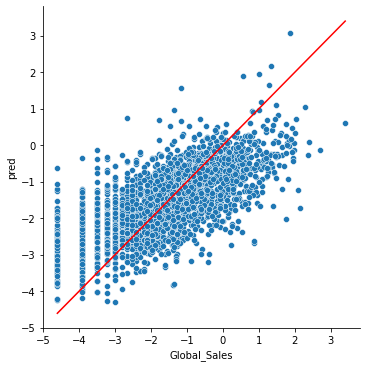

In [25]:
dfresult = pd.DataFrame(y_test)
dfresult['pred']=y_pred
sns.relplot(x='Global_Sales', y='pred', data=dfresult);
sns.lineplot(x='Global_Sales', y='Global_Sales', data=dfresult,color="red");